In [249]:
import matplotlib.pyplot as plt
import pyabf
import pyabf.filter
#import seaborn as sns
from scipy.signal import find_peaks
import numpy as np
filepath = r'Z:\Tsai\11-06-19_VIP-cre_stCROME_mDlx-egfp_P36\t110619bIN_lev_0000-2.abf'
abf = pyabf.ABF(filepath)


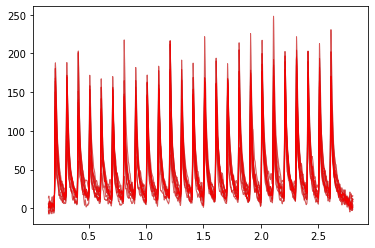

In [269]:
for sweepNum in abf.sweepList[0:10]:
    abf.setSweep(sweepNum , baseline = [3, 5])
    plt.plot(abf.sweepX[1500:28000], abf.sweepY[1500:28000],
             color='k', lw=1, alpha = 0.3)




for sweepNum in abf.sweepList[0:10]:
    abf.setSweep(sweepNum , baseline = [3, 5])
    pyabf.filter.gaussian(abf, 0)  # remove old filter
    pyabf.filter.gaussian(abf, 2)  # apply custom sigma
    abf.setSweep(sweepNum, baseline = [3, 5]) 
    plt.plot(abf.sweepX[1500:28000], abf.sweepY[1500:28000],
             color='r', lw=1, alpha = 0.5)
plt.show()





In [270]:
opto = []
for sweep in abf.sweepList[0:9]:
    abf.setSweep(sweep,channel=0, baseline = [3,5])
    opto.append(abf.sweepY)
opto = np.stack(opto)
x = abf.sweepX

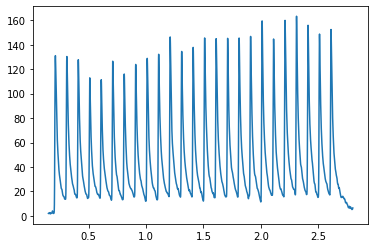

In [271]:
meansweep = np.array(opto).mean(axis = 0)
plt.plot(abf.sweepX[1500:28000], meansweep[1500:28000])


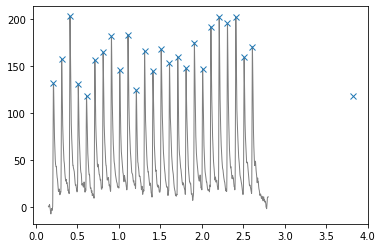

In [303]:
#for sweepNum in abf.sweepList[0:9]:
abf.setSweep(7, baseline = [3, 5])
plt.plot(abf.sweepX[1500:28000], abf.sweepY[1500:28000],
             color='k', lw=1, alpha = 0.5)
peak_time, properties = find_peaks(abf.sweepY, height = [40 , 300], width = 100, distance = 650)
plt.plot(peak_time/10000, abf.sweepY[peak_time], "x")
plt.show()

In [308]:
properties['peak_heights']


array([131.6615, 157.6548, 203.1072, ..., 159.2657, 170.6232, 118.2393])

In [309]:
#find spike method 2 -> better
# peaks, properties = find_peaks(x, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5)
#peak_time, properties = find_peaks(meansweep, height = [150 , 300], distance = 950)
Peaks = []
Peaks_height = []
for sweepNum in abf.sweepList[0:10]:
    abf.setSweep(sweepNum , baseline = [3,5])
    peak_time, properties = find_peaks(abf.sweepY, height = [40 , 300], width = 100, distance = 650)
    print(sweepNum)
    print(len(peak_time))
    print(len(properties['peak_heights']))
    Peaks.append(peak_time[0:25])
    Peaks_height.append(properties['peak_heights'][0:25])
Peaks = np.stack(Peaks)
Peaks_height = np.stack(Peaks_height)

0
25
25
1
25
25
2
25
25
3
25
25
4
25
25
5
25
25
6
26
26
7
26
26
8
25
25
9
25
25


In [310]:
len(Peaks)

10

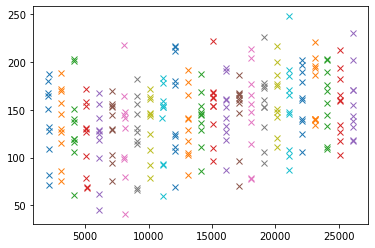

In [312]:
plt.plot(Peaks,Peaks_height, "x")

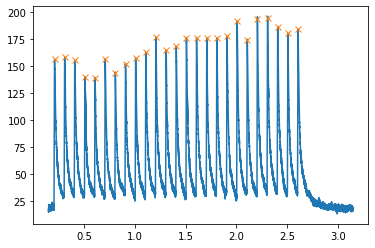

In [150]:
#ploting spike detection
plt.plot(abf.sweepX[1500:31500], meansweep[1500:31500])
plt.plot(peak_time/10000, meansweep[peak_time], "x")
plt.show()

In [151]:
meansweep[peak_time]

array([156.4091, 158.2402, 155.3918, ..., 186.0451, 180.6875, 184.4853],
      dtype=float32)

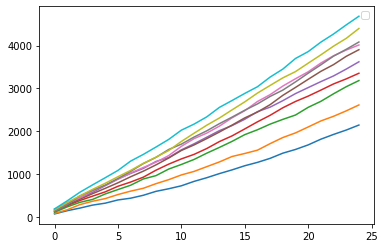

In [320]:
for k in range(len(Peaks_height)):
    plt.plot(np.cumsum(Peaks_height[k]))
   

plt.show()

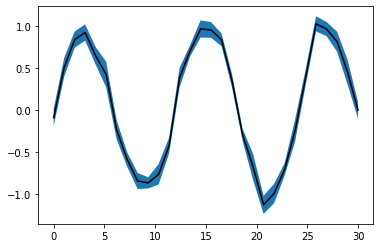

In [74]:
x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error)
plt.show()

In [6]:
#y = []
opto = []
for sweep in abf.sweepList:
    #abf.setSweep(sweep,channel=0)
    #y.append(abf.sweepY)
    abf.setSweep(sweep,channel=0)
    opto.append(abf.sweepY)
#y = np.stack(y)
opto = np.stack(opto)
x = abf.sweepX

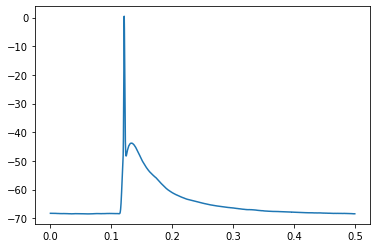

In [7]:
meansweep = np.array(opto).mean(axis = 0)
plt.plot(abf.sweepX, meansweep)


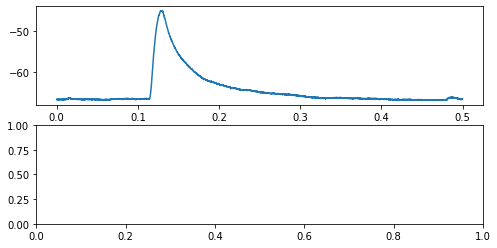

In [8]:
f, ax = plt.subplots(2,1,figsize = (8,4))
#ax[0].plot(x,y[0,:])
ax[0].plot(x,opto[0,:])

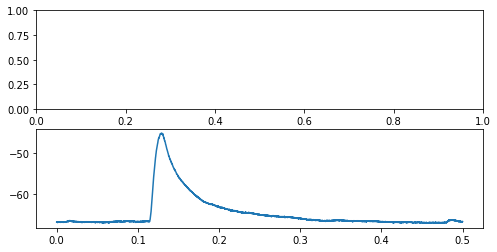

In [9]:
f, ax = plt.subplots(2,1,figsize = (8,4))
#ax[0].plot(x,y[0,:])
ax[1].plot(x,opto[0,:])

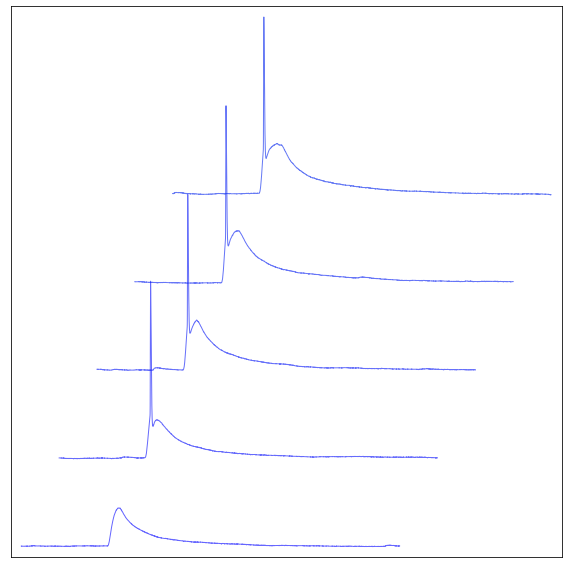

In [10]:
# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(8,8))
for sweepNumber in abf.sweepList[0:5]:
    plt.plot(
        x + .05 * sweepNumber,
        opto[sweepNumber,:] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

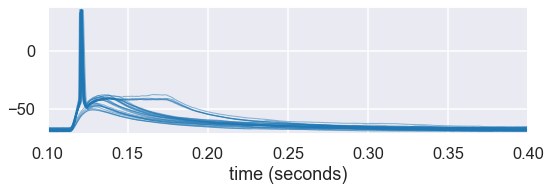

In [11]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
f, ax = plt.subplots(1,1,figsize=(8, 3), sharey = True)

file = 0
for sweepNum in abf.sweepList:
    abf.setSweep(sweepNum)
    ax.plot(abf.sweepX, abf.sweepY,
             color='C0', lw=1, alpha = 0.5)

#     ax.set_xlim([0.1078,0.1084])
# ax.set_ylim([-600,600])
plt.xlabel(abf.sweepLabelX)
plt.xlim((0.1,0.4))
plt.margins(0, .02)
plt.tight_layout()